# Data Mining Project

##### by Chirag Rank (December 2017)

## Project Overview

*Category: Classificaton*

*DataSet: Titanic DataSet(Source: Kaggle.com)*

 

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Import the data

In [6]:
train_data = pd.read_csv('C:/Users/chiragrank/Downloads/train.csv')

### Understanding the data

#### Shape

In [3]:
print("Training data shape: ", train_data.shape)

Training data shape:  (891, 12)


The data has 12 attributes and 891 rows

#### Overview of the attributes and its values in the data

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Variable Name	         Description

Survived(target)  Survived (1) or died (0)
     
       Pclass  Passenger’s class
       
         Name  Passenger’s name
         
          Sex  Passenger’s sex
          
          Age  Passenger’s age
          
        SibSp  Number of siblings/spouses aboard
        
        Parch  Number of parents/children aboard
        
       Ticket  Ticket number
       
         Fare  Fare
         
        Cabin  Cabin
        
     Embarked  Port of embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)

#### Attribute Structure

In [8]:
train_data.info()

#calculating the missing values
print("\n" + "-"*50 + "\n")
print(train_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

--------------------------------------------------

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### Observations:
Total entries is 891.

Age, Cabin and Embark has null values with values 177, 687 and 2 respecttively

Seven features are integer or floats in train dataset.

Five features are strings (object) in train dataset

## Data Exploration(Analyse and Identify the patterns)

### Do Passengers paying more has better survival rate?

#### 1) Survival Rate for Individual Passenger Class

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


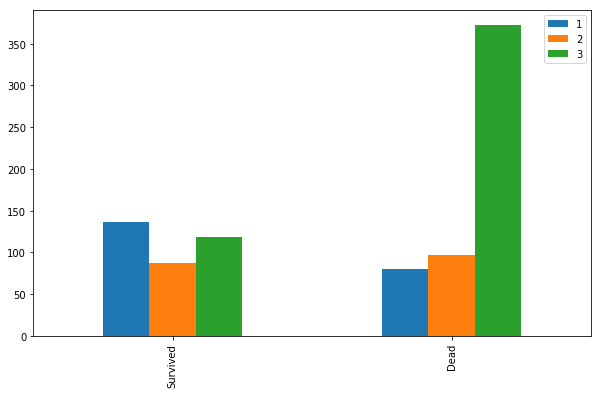

In [9]:
print(train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
cl_dead = train_data[train_data['Survived']==0]['Pclass'].value_counts()
cl_survive = train_data[train_data['Survived']==1]['Pclass'].value_counts()
df = pd.DataFrame([cl_survive, cl_dead])
df.index = [['Survived','Dead']]
df.plot(kind='bar',figsize=(10,6))

##### Observation:
The Probablity of the survival rate is lowest for Class value = 3 which is quite visible from the plot.

#### 2) Survival rate for the fare values

        FareCategory  Survived
0     (-0.001, 7.75]  0.207143
1       (7.75, 8.05]  0.200000
2     (8.05, 12.475]  0.316327
3   (12.475, 19.258]  0.406250
4     (19.258, 27.9]  0.445312
5     (27.9, 56.929]  0.456000
6  (56.929, 512.329]  0.685039


C:\Users\chiragrank\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


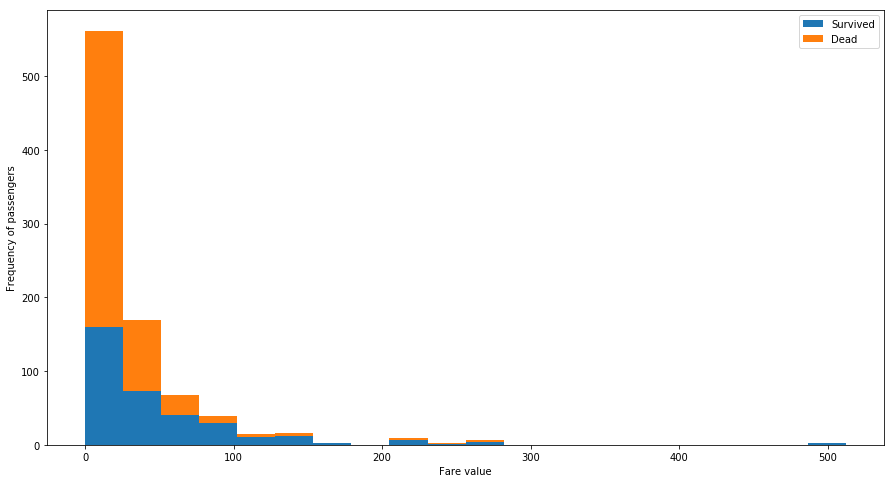

In [47]:
train_data['FareCategory'] = pd.qcut(train_data['Fare'], 7)
print (train_data[['FareCategory', 'Survived']].groupby(['FareCategory'], as_index=False).mean())

figure = plt.figure(figsize=(15,8))
plt.hist([train_data[train_data['Survived']==1]['Fare'],train_data[train_data['Survived']==0]['Fare']], stacked=True,
         bins = 20 ,label = ['Survived','Dead'])
plt.ylabel('Frequency of passengers')
plt.xlabel('Fare value')
plt.legend()

##### Observation: 
The survival rate is as high as around 68 percent for high fare passengers which is atleast 20 percent more than the lower and even considerably higher than the lowest bracket.  

#### 3) Do Size of the Family affect the survival rate?

In [11]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
print (train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


#### Observation:
The survival rate shows increase initially but then decreases as the size of the family increase from 4. So lets analyse further to arrive at definite conclusion

In [12]:
train_data['Alone'] = 0
train_data.loc[train_data['FamilySize'] == 1, 'Alone'] = 1
print (train_data[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean())

   Alone  Survived
0      0  0.505650
1      1  0.303538


##### Observation:
We can say that travelling alone do increase the survival rate.

#### 4) Do Port of Embarkation affect the survival rate?

In [13]:
#Fill the missing values with Southampton port
train_data['Embarked'] = train_data['Embarked'].fillna('S')

(array([  93.,    0.,    0.,    0.,    0.,   30.,    0.,    0.,    0.,  219.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

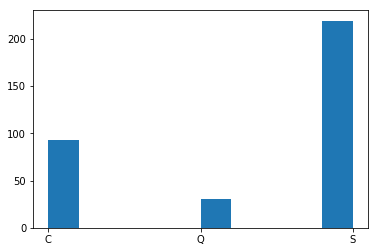

In [16]:
# print (train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())
plt.hist(train_data[train_data['Survived']==1]['Embarked'])

#### Observation: 
The survival rate is highest  for Southampton. Lower for Cherbourg and Lowest for Queenstown

#### 5) Do sex and age affect the survival rate?

In [15]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


The survival rate of the female is 74 percent as against 18 percent of the male

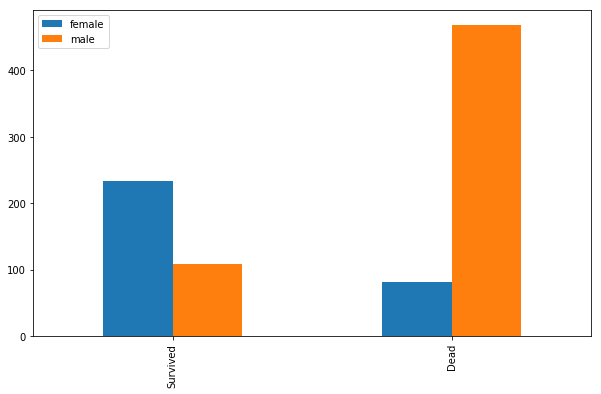

In [17]:
sex_survive = train_data[train_data['Survived']==1]['Sex'].value_counts()
sex_dead = train_data[train_data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([sex_survive,sex_dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',figsize=(10,6))

#### Observation:
The survival rate of the female is more than the men

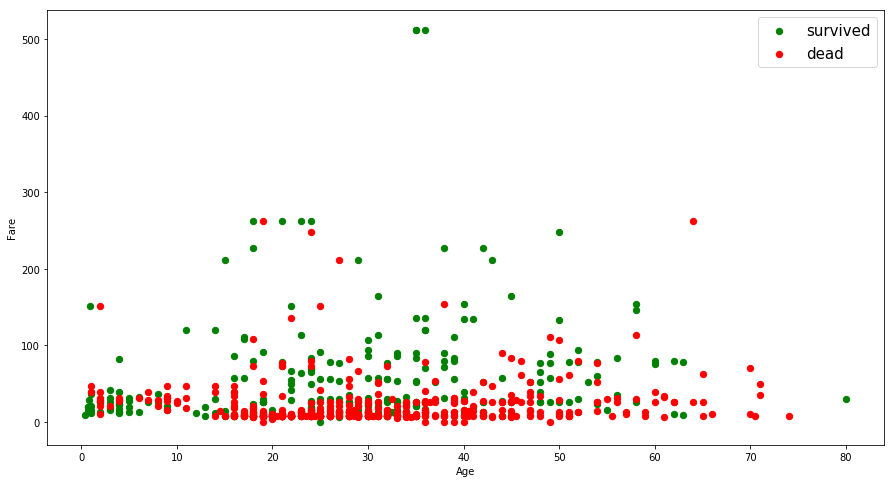

In [18]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train_data[train_data['Survived']==1]['Age'],train_data[train_data['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(train_data[train_data['Survived']==0]['Age'],train_data[train_data['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

#### Observation:
The survival rate decreases with the age and Increases with the fare value.

## Data Processing(Feature Engiering and Feature Selection)

In [25]:
data = pd.read_csv('C:/Users/chiragrank/Downloads/train.csv')


# Remove the target variable from the training data
targets = data.Survived
data.drop('Survived', 1, inplace=True)

### Title Variable Processing

In [26]:
# Split the entries in the variables, 
#replace them with four categories: Mr, Miss, Mrs and Master 
#convert them into numerical values.
data['Title'] = data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())


data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')


title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data['Title'] = data['Title'].map(title_mapping)
data['Title'] = data['Title'].fillna(0)

### Age Variable Processing

In [22]:
data['Age'].isnull().sum()

177

Age variable has 177 null values.

In [27]:
# Replacing those null values with random integers within one standard deviation of the mean.
null_age = data['Age'].isnull().sum()
avg_age = data['Age'].mean()
std_age = data['Age'].std()
    
age_random_list = np.random.randint(avg_age - std_age, avg_age + std_age, size = null_age)
data['Age'][np.isnan(data['Age'])] = age_random_list
data['Age'] = data['Age'].astype(int)

C:\Users\chiragrank\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### Fare Variable Processing 

In [29]:
#Converting the values of Fare variable into four levels with Fare less than 7.91 = 0, 
#greater than 7.91 and less than 27.9 equals to 1, greater than 27.9 and less than 56.929 equals to 2, 
#and greater than 56.926 as 3

data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 27.9), 'Fare'] = 1
data.loc[(data['Fare'] > 27.9) & (data['Fare'] <= 56.929), 'Fare']   = 2
data.loc[ data['Fare'] > 56.929, 'Fare'] = 3
data['Fare'] = data['Fare'].astype(int)

### Converting categorical variables into numerical variable.

In [31]:
# Embarkment point, Sex and Title variable has categories. 
#So using the label encoder from sklearn to convert the categorial variable into numerical variable

labelEncoder=LabelEncoder()
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked']=labelEncoder.fit_transform(data['Embarked'])

data['Sex']=labelEncoder.fit_transform(data['Sex'])

data['Title']=labelEncoder.fit_transform(data['Title'])

### Dropping the variables

#### Observation:
Variables Dropped: PassengerID, Name, Ticket, Cabin

PassengerID, Name, Ticket because they are identity variable with almost unique values.

Cabin variable because it has 687 and 327 missing values which is 77 percent of the training data and 78 percent of the test data

In [32]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

## Prediction

Splitting the data, Training the model: 70 percent data with 623 entries, Testing the model: 30 percent data with 268 entries

#### Classifiers Used:
1) Support Vector Machine

2) Random Forest

3) KNN 

4) Gaussian Nave Bayes

##### Ensemble Classifiers

5) Gradient Boosting

6) AdaBoost

7) Voting Classifier using svc, gnb, abc, rf

In [39]:
train_x , test_x , train_y , test_y = train_test_split( data , targets , train_size = .7 )

C:\Users\chiragrank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [34]:
print(train_x.shape , test_x.shape , train_y.shape , test_y.shape)

(623, 8) (268, 8) (623,) (268,)


#### Support Vector Machine

In [37]:
svc = SVC()
svc.fit(train_x, train_y)
predicted_svc = svc.predict(test_x)
acc_svc = (accuracy_score(test_y, predicted_svc)) * 100
acc_svc

80.970149253731336

#### Random Forest

In [38]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_x, train_y)
predicted_rf = rf.predict(test_x)
acc_rf = (accuracy_score(test_y, predicted_rf)) * 100
acc_rf

80.223880597014926

#### KNN

In [40]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x, train_y)
predicted_knn = knn.predict(test_x)
acc_knn = (accuracy_score(test_y, predicted_knn)) * 100
acc_knn

77.985074626865668

#### Gaussian Naive Bayes

In [41]:
gsn = GaussianNB()
gsn.fit(train_x, train_y)
predicted_gsn = gsn.predict(test_x)
acc_gsn = (accuracy_score(test_y, predicted_gsn)) * 100
acc_gsn

81.343283582089555

#### Gradient Boosting

In [42]:
gbc = GradientBoostingClassifier()
gbc.fit(train_x, train_y)
predicted_gbc = gbc.predict(test_x)
acc_gbc = (accuracy_score(test_y, predicted_gbc)) * 100
acc_gbc

81.71641791044776

#### AdaBoost

In [44]:
abc = AdaBoostClassifier()
abc.fit(train_x, train_y)
predicted_abc = abc.predict(test_x)
acc_abc = (accuracy_score(test_y, predicted_abc)) * 100
acc_abc

80.597014925373131

#### Voting Classifier

In [45]:
vc = VotingClassifier(estimators=[
        ('svc', svc), ('abc', abc), ('gbc', gbc), ('rf', rf)], voting='hard')


vc.fit(train_x, train_y)


predicted_vc = vc.predict(test_x)
acc_vc = (accuracy_score(test_y, predicted_vc)) * 100
acc_vc

82.462686567164184

### Model Comparison

In [46]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',
              'Random Forest', 'Naive Bayes', 'Gradient Boosting', 'AdaBoost', 'Voting Classifier'
              ],
    'Score': [acc_svc, acc_knn, 
              acc_rf, acc_gsn, acc_gbc, 
              acc_abc, acc_vc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,Voting Classifier,82.462687
4,Gradient Boosting,81.716418
3,Naive Bayes,81.343284
0,Support Vector Machines,80.970149
5,AdaBoost,80.597015
2,Random Forest,80.223881
1,KNN,77.985075


### CONCLUSION:
TOP PERFORMING CLASSIFIER: Voting Classifier, an ensemble classifier in which votes of Support Vector Machine Classifier, AdaBoost Classifier, GradientBoosting Classifier, Random Forest Classiers were used